In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
%pip install kagglehub

import kagglehub
uciml_red_wine_quality_cortez_et_al_2009_path = kagglehub.dataset_download('uciml/red-wine-quality-cortez-et-al-2009')

print('Data source import complete.')


Note: you may need to restart the kernel to use updated packages.


c:\Users\Dell\PyhtonIA\ML Modelos Ensemble\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 25.6k/25.6k [00:00<00:00, 10.7MB/s]

Extracting files...
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Los archivos de datos están disponibles en la ruta descargada por kagglehub
# Mostrar todos los archivos en el directorio del dataset descargado

import os
print("Archivos descargados por kagglehub:")
for dirname, _, filenames in os.walk(uciml_red_wine_quality_cortez_et_al_2009_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(f"\nRuta del dataset: {uciml_red_wine_quality_cortez_et_al_2009_path}")

Archivos descargados por kagglehub:
C:\Users\Dell\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2\winequality-red.csv

Ruta del dataset: C:\Users\Dell\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


In [12]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore")



%matplotlib inline


In [4]:
#load the data and check the shape
# Usar la ruta del dataset descargado por kagglehub
import os
dataset_path = uciml_red_wine_quality_cortez_et_al_2009_path
wine_file = os.path.join(dataset_path, "winequality-red.csv")
df = pd.read_csv(wine_file)
df.shape

(1599, 12)

In [5]:
#check the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#check the duplicate rows
print("Number of duplicated rows are: ",df.duplicated().sum())

#dropping the duplicated rows
df=df.drop_duplicates(keep="first")
print("After removing,now number of duplicated rows are:",df.duplicated().sum())

Number of duplicated rows are:  240
After removing,now number of duplicated rows are: 0


great !!!!!!.we remove all the duplicated rows ,lets move .
    

In [8]:
#check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in our dataset ,great!!!!!!!!

In [9]:
#describing the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#check the correlation between the quality to each of columns
df.corr()["quality"]

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

we observed that alcohol and sulphates is highly propotional to quality and volatile acidity is inversely propotional to the quality col..

<Axes: title={'center': 'Correlation heatmap'}>

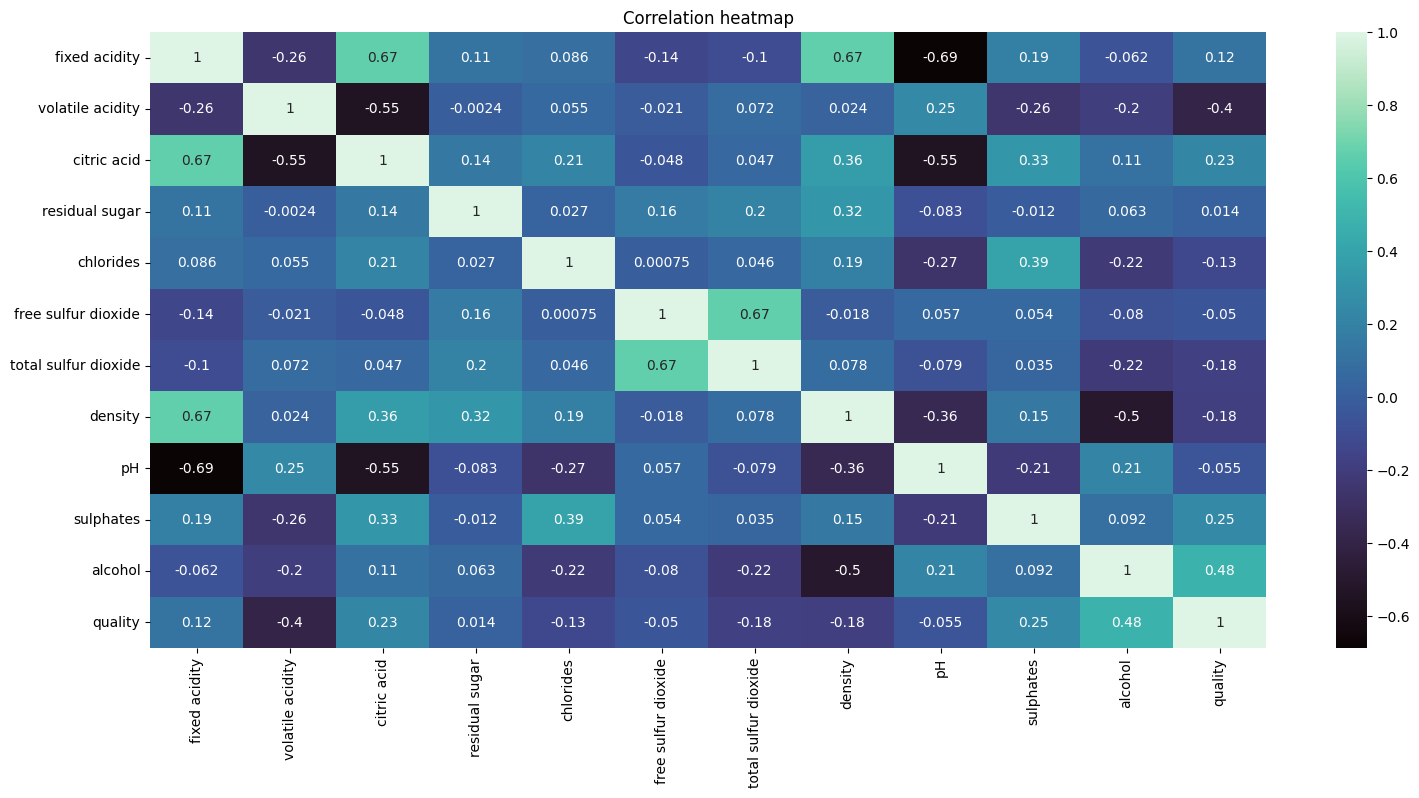

In [13]:
#Graphically represent the correlation with heatmap
plt.figure(figsize=(18,8))
plt.title("Correlation heatmap")
sns.heatmap(df.corr(),annot=True,cmap="mako")

There are no pair of highly correlated independent features (Multicolinarity problems) ..that's great!!!!!!!

In [14]:
df["quality"].unique()# here 6 types of rating available in quality columns

array([5, 6, 7, 4, 8, 3])

In [15]:
#get all the features in X.
X=df.iloc[:,0:-1]

#get the terget columns
y=df["quality"]
y=pd.DataFrame(y,columns=["quality"])
y.value_counts()

quality
5          577
6          535
7          167
4           53
8           17
3           10
Name: count, dtype: int64

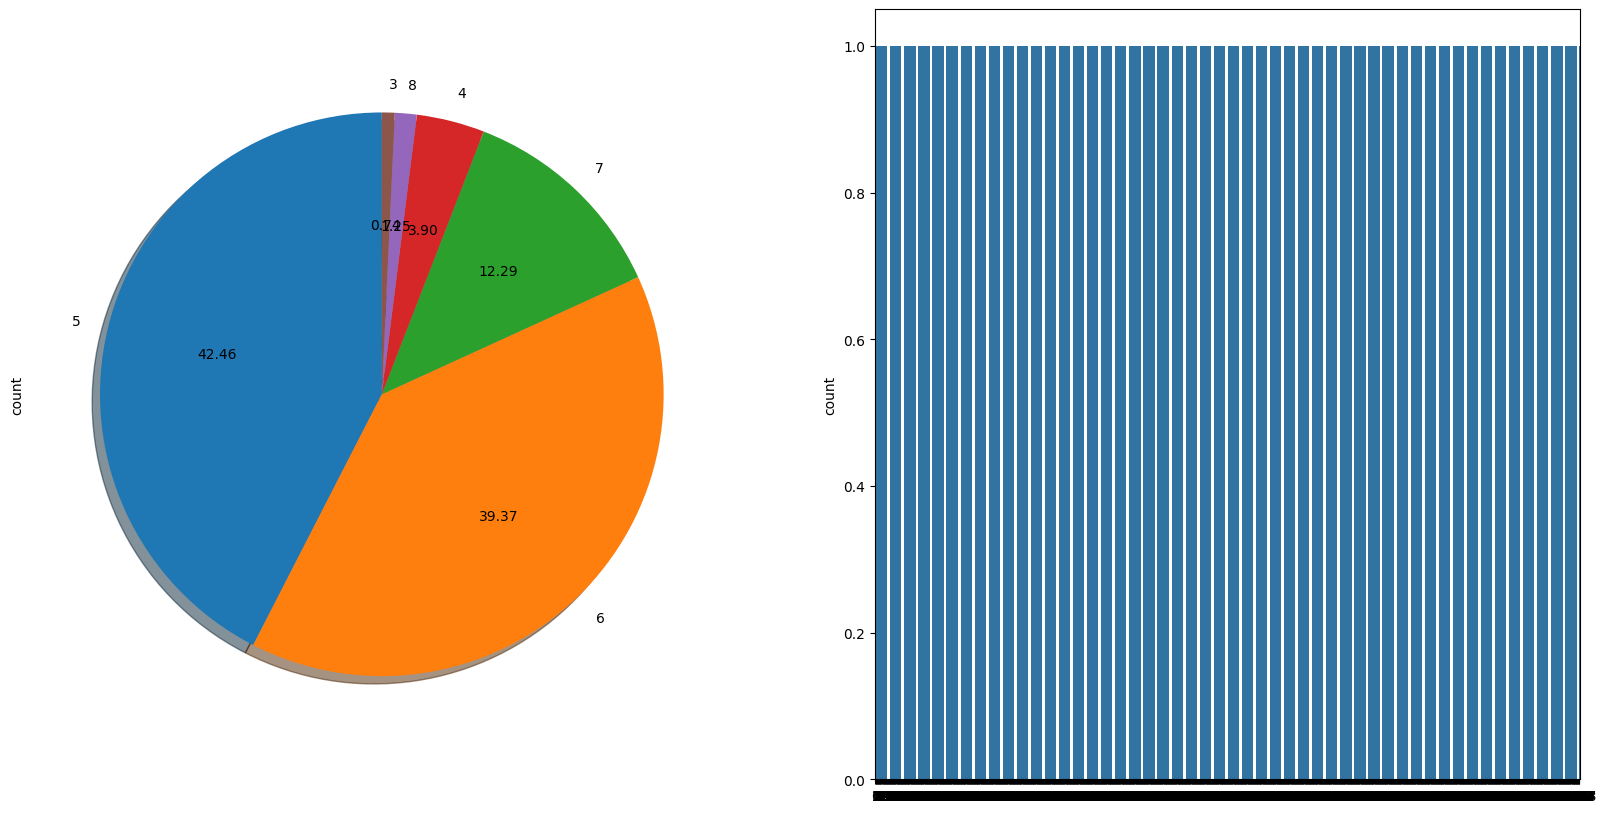

In [16]:
# check the classes is balanced or not....
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
y["quality"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True, startangle=90)

plt.subplot(1,2,2)
sns.countplot(y["quality"])

plt.show()

this is totally imbalanced data or class ,class 5 and 6 contain the most of the data compare to the other classes.class 5 contain 577 data and class 6 contain 535 data and other classes contain rest of the data.....we should fix it to balanced the data or classes..

# EDA for data analysis

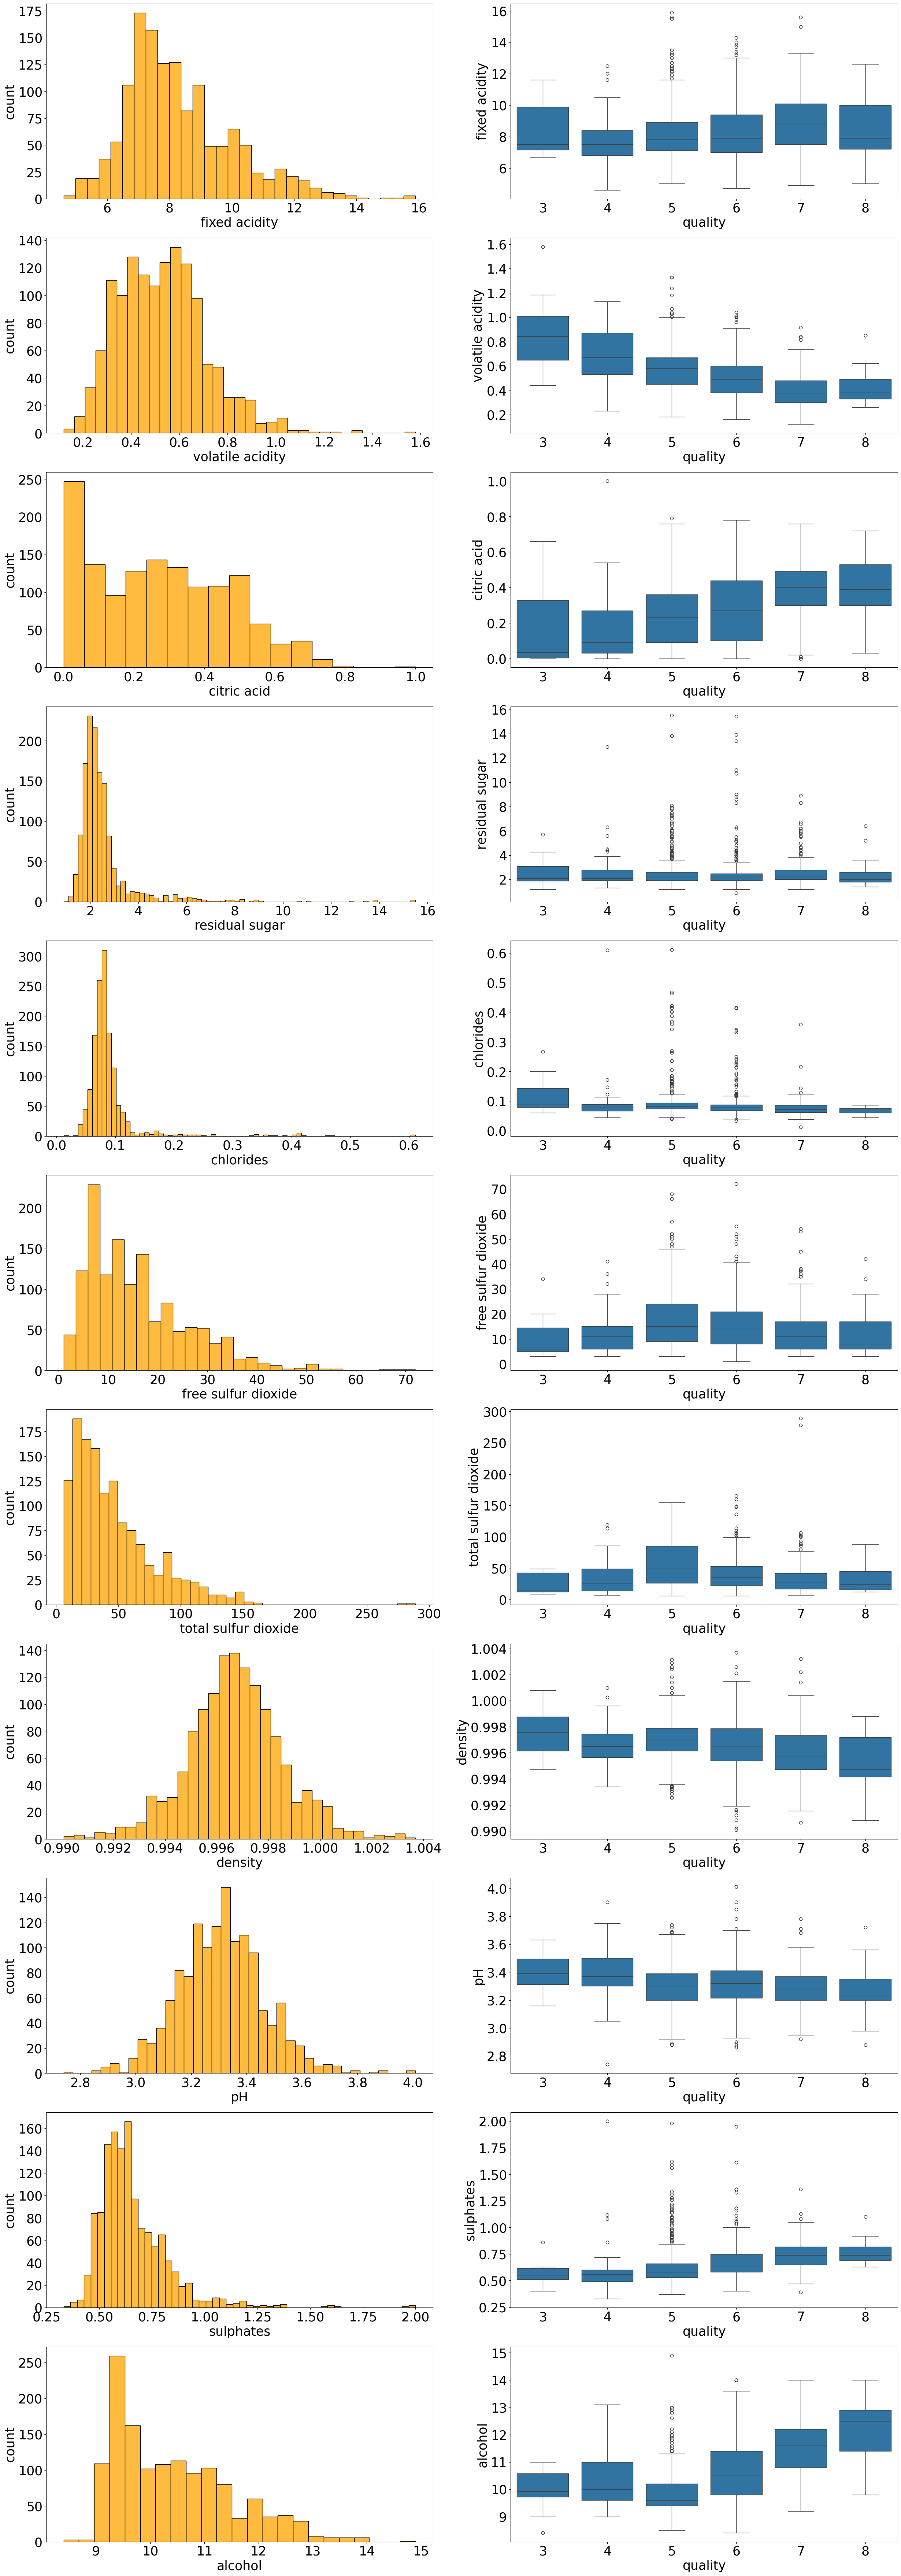

In [18]:
#analysing features cloumns with histogram  and boxplot
#using histogram we perform univariate analysis
#using box plot we perform bi-variate analysis
i=1
plt.figure(figsize=(30,90))
for col in X.columns:
    plt.subplot(11,2,i)
    sns.histplot(X[col],color="orange")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)

    i=i+1
    plt.subplot(11,2,i)
    sns.boxplot(x=y["quality"], y=X[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("quality",fontsize=25)
    plt.ylabel(col,fontsize=25)
    i=i+1

plt.show()

here we got some skewed col ,we want to tranformed this using power transformer or function transformer !!!!!!!!!!


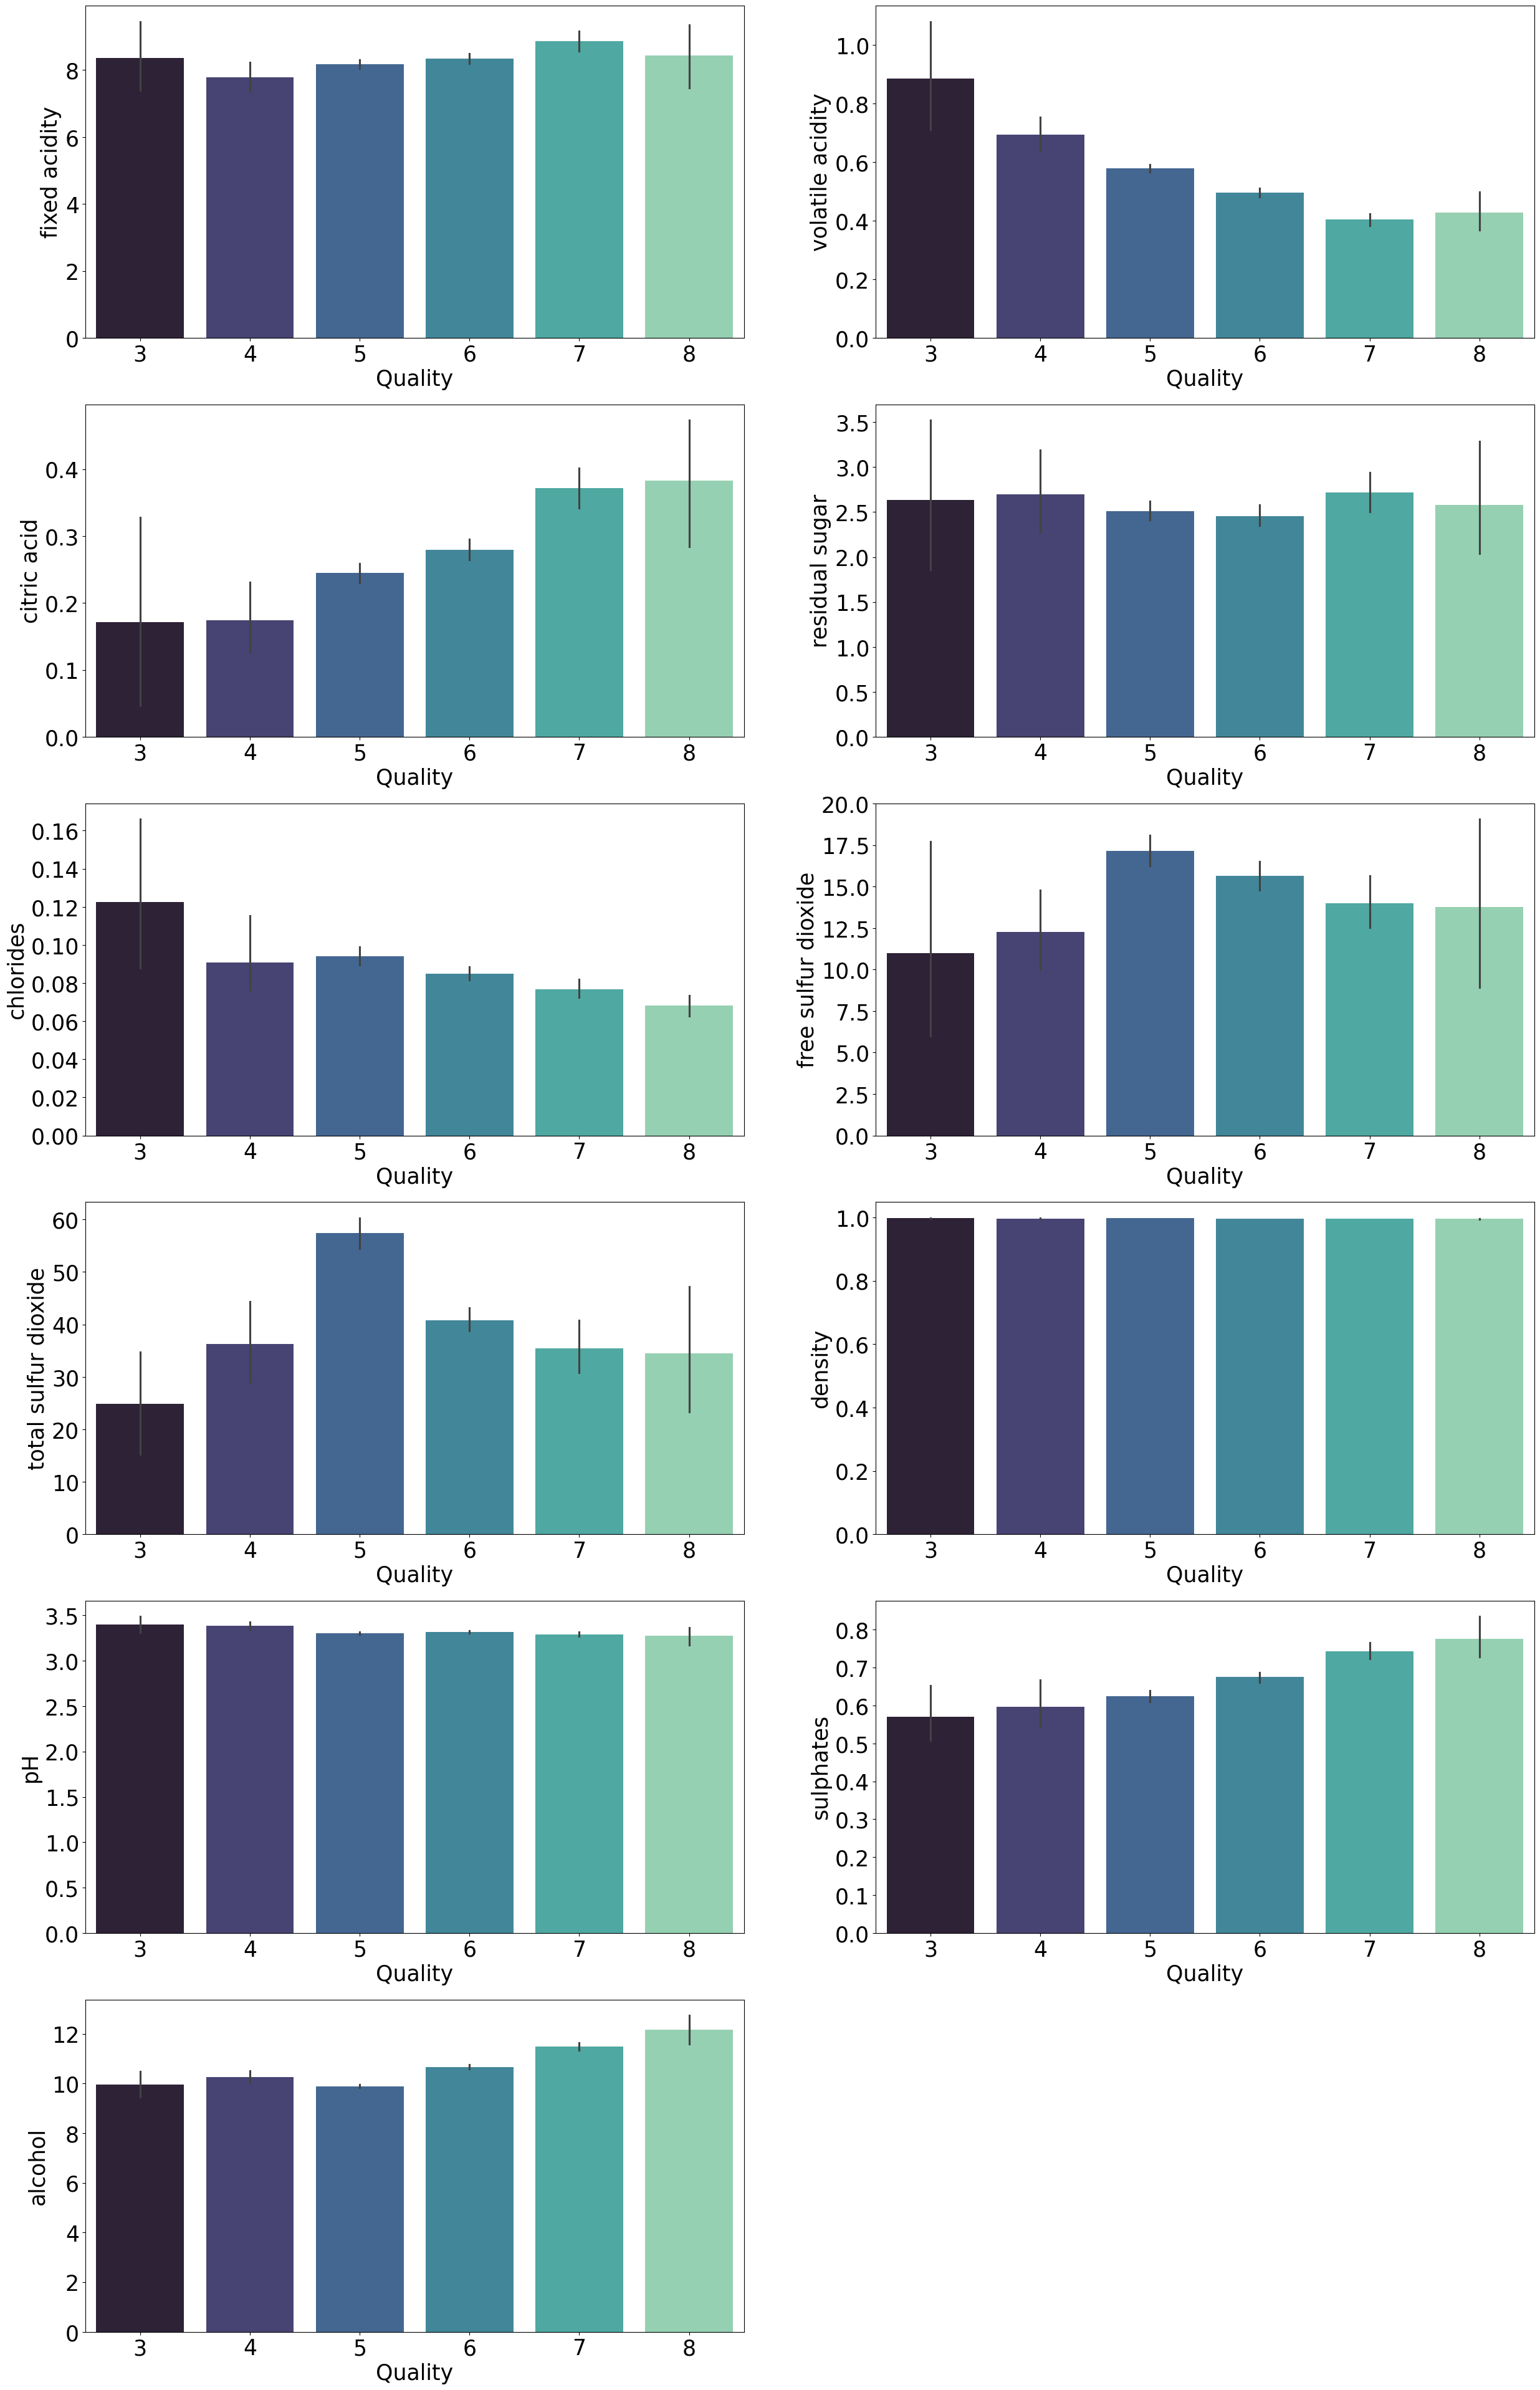

In [20]:
# Analysis each of the columns with quality col using BarPlot
i=1
plt.figure(figsize=(30,90))
for col in X.columns:
    plt.subplot(11,2,i)
    sns.barplot(x=df["quality"], y=df[col], palette="mako")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Quality",fontsize=25)
    plt.ylabel(col,fontsize=25)

    i=i+1

plt.show()

In [34]:
#Balancíng the data point for each classes.
from imblearn.combine import SMOTEENN
os=SMOTEENN(random_state=42)
X,y=os.fit_resample(X,y)

In [33]:
# Transformar las etiquetas de calidad para XGBoost
# Las etiquetas originales van de 3 a 8, pero XGBoost necesita que vayan de 0 a n-1
from sklearn.preprocessing import LabelEncoder

print("Clases originales:", sorted(y['quality'].unique()))

# Crear el encoder y transformar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y['quality'])

# Convertir de vuelta a DataFrame
y = pd.DataFrame(y_encoded, columns=['quality'])

print("Clases transformadas:", sorted(y['quality'].unique()))
print("Mapeo de clases:")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"  Calidad {original} -> {encoded}")

Clases originales: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Clases transformadas: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Mapeo de clases:
  Calidad 3 -> 0
  Calidad 4 -> 1
  Calidad 5 -> 2
  Calidad 6 -> 3
  Calidad 7 -> 4
  Calidad 8 -> 5


In [22]:
#check the shape and class of y after up-sampling
print(X.shape,y.shape)
print(y.value_counts())
print("Numbers of duplicated point after up sampling:",X.duplicated().sum())

(1826, 11) (1826, 1)
quality
3          488
8          444
4          402
7          341
5          109
6           42
Name: count, dtype: int64
Numbers of duplicated point after up sampling: 0


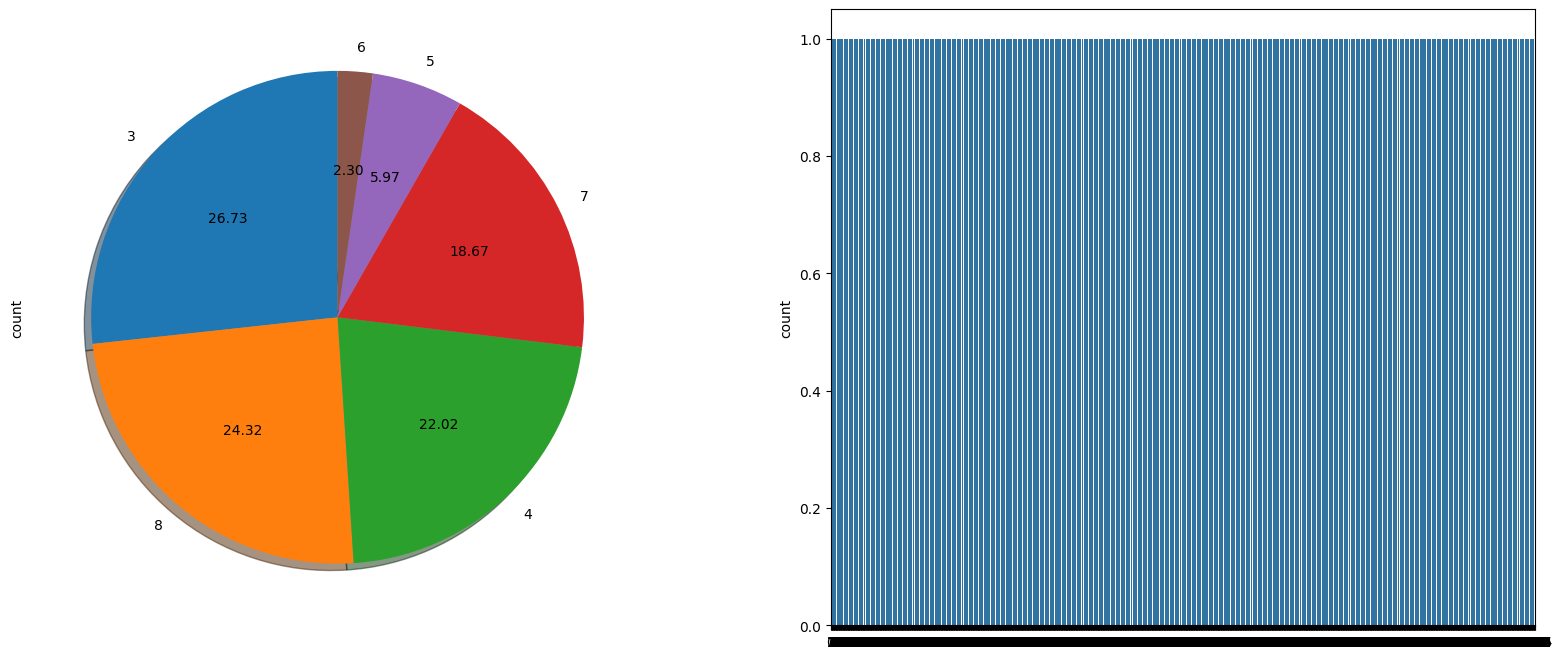

In [23]:
# After up sampling ,check the classes is balanced or not....
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
y["quality"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True, startangle=90)

plt.subplot(1,2,2)
sns.countplot(y["quality"])

plt.show()

our classes are not fully balanced but almost balanced now , great!!!!!!

In [35]:
#It is a good practise to split the data to avoiding the data leakage
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (2262, 11)
X_test shape:  (566, 11)
Y_train shape:  (2262, 1)
Y_test shape:  (566, 1)


In [25]:
# Let's check for skewed columns
def distribution(data):
    #let find the skewed col and fix them
    skew_limit=0.75 # limit for skewed col
    skew_vals=data[X.columns].skew()
    skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

    #graphically represent the skewed col
    i=1
    print("Columns names: ",skew_col.index)
    print("\n\n")
    print(skew_col)
    plt.figure(figsize=(50,90))
    for col in skew_col.index:
        plt.subplot(8,2,i)
        sns.distplot(X[col],color="r")
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel(col,fontsize=25)
        i=i+1


    plt.show()

Columns names:  Index(['chlorides', 'total sulfur dioxide', 'residual sugar',
       'free sulfur dioxide', 'sulphates', 'volatile acidity'],
      dtype='object')



chlorides               3.509250
total sulfur dioxide    2.812117
residual sugar          2.346352
free sulfur dioxide     2.003007
sulphates               1.200517
volatile acidity        0.858890
dtype: float64


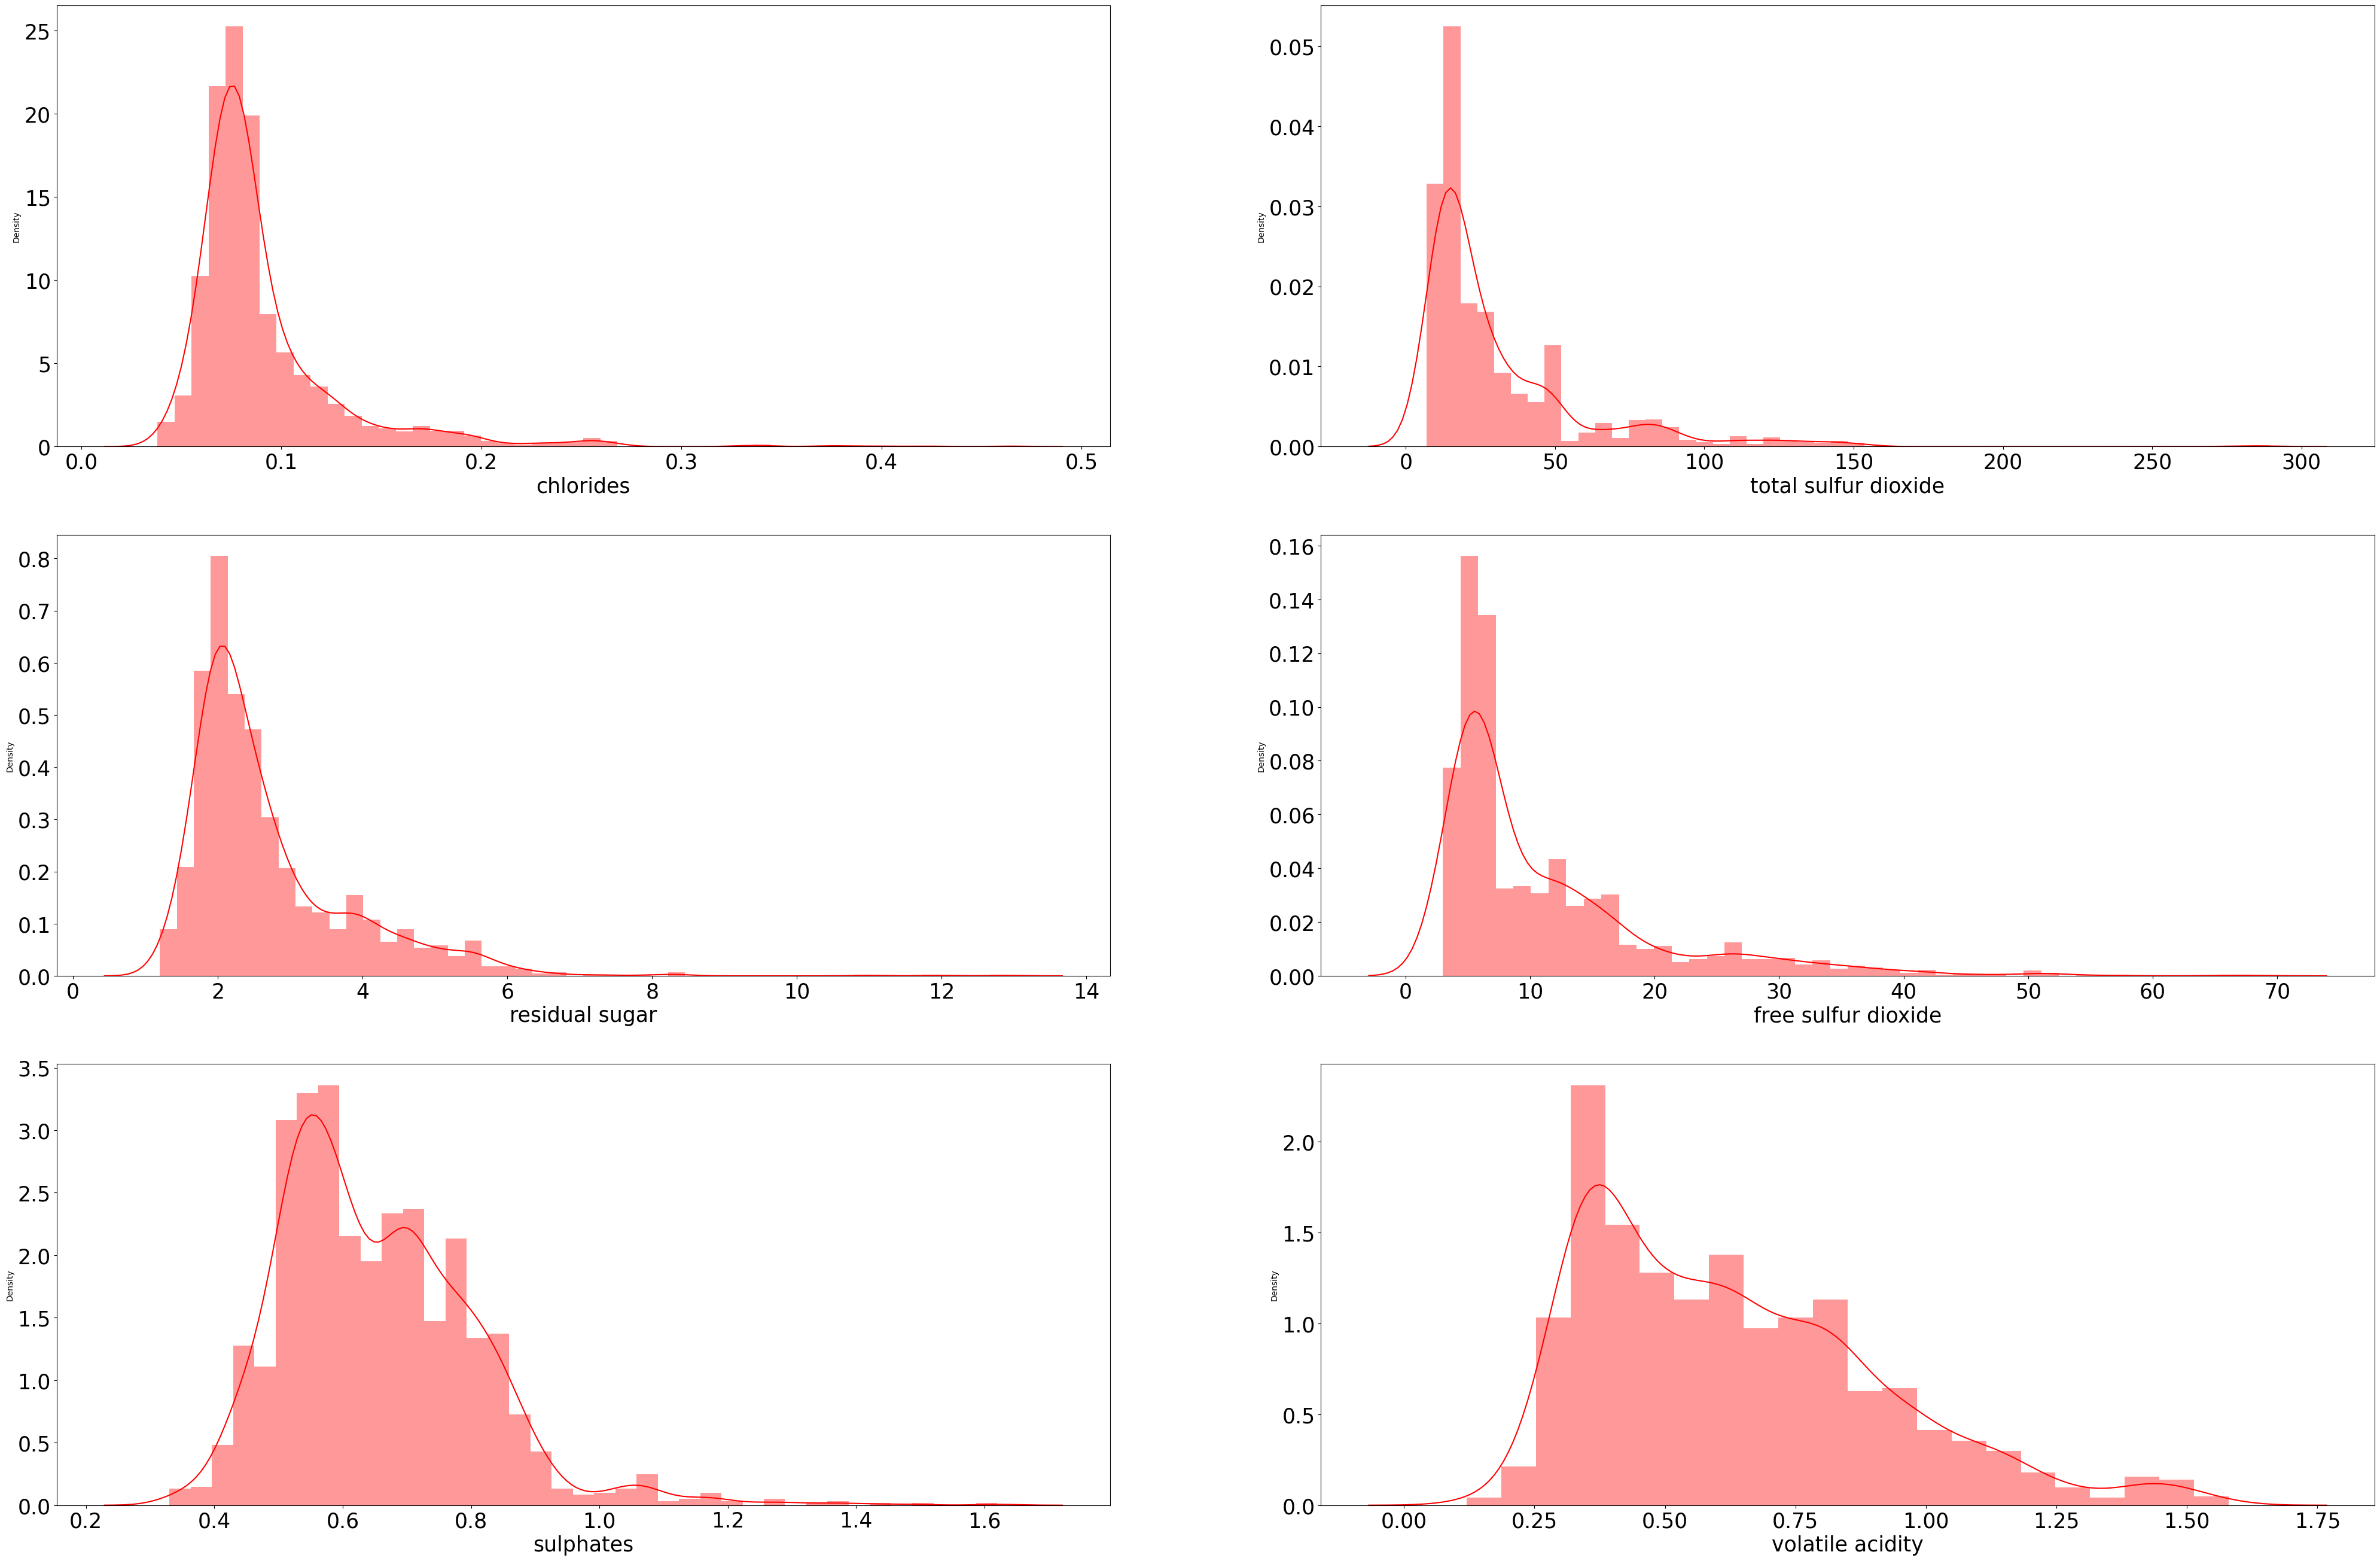

In [26]:
#calling the function for checking the skewed colmuns
distribution(x_train)

we got 6 skewed columns ,and almost all of them are right skewed

In [27]:
#lets fix them with power transformer (mathematical transformation)
skewed_col=['chlorides', 'residual sugar', 'total sulfur dioxide', 'sulphates',
       'free sulfur dioxide', 'volatile acidity'] #our skewed col list.
pt=PowerTransformer(standardize=False)# power transformer function.
x_train[skewed_col]=pt.fit_transform(x_train[skewed_col])
x_test[skewed_col]=pt.transform(x_test[skewed_col])
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
439,8.711047,0.462532,0.194433,0.503441,0.044504,1.049328,1.323879,0.996601,3.365087,0.253285,9.907994
544,8.103682,0.375928,0.009942,0.519068,0.037741,1.231559,1.448588,0.997914,3.375581,0.245329,9.614729
182,7.890124,0.426346,0.030247,0.553942,0.038086,1.048067,1.328166,0.998633,3.452675,0.255492,10.726749
170,7.016788,0.422966,0.010949,0.531637,0.038606,1.075243,1.342449,0.996272,3.586204,0.275080,10.289415
292,6.766196,0.395803,0.018529,0.488466,0.037924,1.091168,1.323909,0.995909,3.546322,0.279695,10.019873


In [28]:
# after applying power transformer ...
x_train[skewed_col].skew()

chlorides               0.157405
residual sugar          0.102900
total sulfur dioxide    0.141885
sulphates               0.000946
free sulfur dioxide     0.142981
volatile acidity        0.073859
dtype: float64

great now we don't have any skewed columns in our features !!!!!!!

In [29]:
# Scaling all the features with min max scaler
sc_m=MinMaxScaler()
x_train=sc_m.fit_transform(x_train)
x_test=sc_m.transform(x_test)

great,,, our features are ready to fit in the modol,all the step we have done !!!!!!!

# Evaluating models on the data

In [36]:
#Evaluating the models with data using this function..
def evaluate(model):
    # Convertir y_train y y_test a arrays 1D si son DataFrames
    y_train_1d = y_train['quality'] if hasattr(y_train, 'columns') else y_train
    y_test_1d = y_test['quality'] if hasattr(y_test, 'columns') else y_test
    
    model.fit(x_train, y_train_1d)
    y_pred = model.predict(x_test)

    #printing the model name and accuracy !!!!!
    print("Model name:---->>>", model)
    print("accuracy score:--->>", accuracy_score(y_test_1d, y_pred))
    print("\n")
    print(classification_report(y_test_1d, y_pred))
    print("<<<<-------------------------------------------------------------------->>>>")


In [37]:
#Initialize the models
LR=LogisticRegression(solver="newton-cg") #Logistic regression.
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=1,weights='uniform')
svc=SVC(C=100,gamma=1,kernel='rbf',random_state=42) # support vector classifier.
dtc=DecisionTreeClassifier()



models=[LR,knn,svc,dtc] #create a list of models

for model in models:
    evaluate(model)


Model name:---->>> LogisticRegression(solver='newton-cg')
accuracy score:--->> 0.6925795053003534


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       101
           1       0.55      0.61      0.58        92
           2       0.86      0.85      0.85        99
           3       0.61      0.56      0.58        89
           4       0.62      0.59      0.60        92
           5       0.68      0.70      0.69        93

    accuracy                           0.69       566
   macro avg       0.69      0.69      0.69       566
weighted avg       0.69      0.69      0.69       566

<<<<-------------------------------------------------------------------->>>>
Model name:---->>> KNeighborsClassifier(metric='manhattan', n_neighbors=1)
accuracy score:--->> 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        92
           2   

Here our best model is KNeighborsClassifier (97.2% accuracy) and Support vector classifier (97.2% accuracy) and 2 nd best model is DecisionTreeClassifier(93% accuracy)....great job!!!

In [38]:
#let's play with our ensamble models.
rf=RandomForestClassifier(random_state=42) #random forest classifier.
gbr=GradientBoostingClassifier(learning_rate=1, n_estimators=300, criterion='squared_error', random_state=42)
xgb=XGBClassifier(learning_rate=0.1,n_estimators=500,random_state=42) #extream gradient boosting classifier.

models=[rf,gbr,xgb] #create a list of models

for model in models:
    evaluate(model)

#it's show time ,yaaaaaaaaaaaaaaaahhhh!!!!!!!!

Model name:---->>> RandomForestClassifier(random_state=42)
accuracy score:--->> 0.9876325088339223


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           1       0.97      1.00      0.98        92
           2       1.00      0.96      0.98        99
           3       0.98      0.99      0.98        89
           4       0.98      0.99      0.98        92
           5       1.00      1.00      1.00        93

    accuracy                           0.99       566
   macro avg       0.99      0.99      0.99       566
weighted avg       0.99      0.99      0.99       566

<<<<-------------------------------------------------------------------->>>>
Model name:---->>> GradientBoostingClassifier(criterion='squared_error', learning_rate=1,
                           n_estimators=300, random_state=42)
accuracy score:--->> 0.9858657243816255


              precision    recall  f1-score   support

           0       1.00      1

Here among all the Ensamble models ,ours best model is XGBClassifier(97.5% accuracy),2nd best model is GradientBoostingClassifier(97.2% accuracy)...great!!!!!!

# Among all the models our top 3 models are:---
# 1.XGBClassifier(97.5% accuracy)

# 2.KNeighborsClassifier (97.2% accuracy) , Support vector classifier (97.2% accuracy) and GradientBoostingClassifier(97.2% accuracy)

# 3.RandomForestClassifier(95.9% accuracy)

# Yaahooooo!we got great accuracy !!!!!

# If you like this notebook plz consider a upvote for me ..........Happy kaggling !!!!!!!